# Projet numérique : choix du pas de temps

Théophile Le Clerc et Stephen Piet

## Pas fixe

In [12]:
import numpy as np
from math import *

def solve_euler_explicit(f, x0, dt, t0, tf):
    """
    Donne une solution approchée du système de Cauchy dx/dt = f(x,t) et x(t0)=x0 par la méthode d'Euler explicite
    """
    n = floor((tf-t0)/dt) + 1
    t = np.array([(t0 + i*dt) for i in range(0,n)])
    x = np.array([x0 for i in range(0,n)])
    for i in range(1,n):
        x[i] = x[i-1] + f(t[i-1],x[i-1])*dt
    return t, x

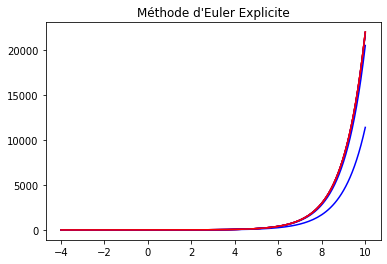

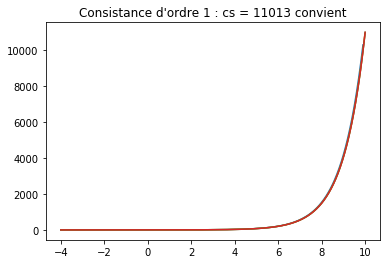

In [71]:
def f(t,x):
    return x

import matplotlib.pyplot as plt
%matplotlib inline


for dt in [0.1, 0.01, 0.001, 0.0001]:
    T,X = solve_euler_explicit(f,np.exp(-4),dt,-4,10)
    plt.plot(T,X, "b")
    plt.plot(T,np.exp(T),"r")
plt.title("Méthode d'Euler Explicite")
plt.show();
    
for dt in [0.1, 0.01, 0.001, 0.0001]:
    T,X = solve_euler_explicit(f,np.exp(-4),dt,-4,10)
    S = np.exp(T)
    n = len(S)
    eta = np.array([(S[i+1]-S[i]-dt*f(T[i],S[i]))/dt for i in range(0,n-1)])
    plt.plot(T[:-1], eta/dt)
plt.title(f"Consistance d'ordre 1 : cs = {ceil(eta[n-2]/dt)} convient")
plt.show();


In [42]:
def solve_heun(f,x0, dt, t0, tf):
    """
    Résout de manière approché l'équation dx/dt = f(t,x) par la méthode de Heun
    """
    n = floor((tf-t0)/dt)
    t = np.array([(t0 + i*dt) for i in range(0,n)])
    x = np.array([x0 for i in range(0,n)])
    for i in range(1,n):
        x[i] = x[i-1] + dt/2*( f(t[i-1], x[i-1]) + f(t[i], x[i-1] + dt*f(t[i-1], x[i-1])))
    return t, x

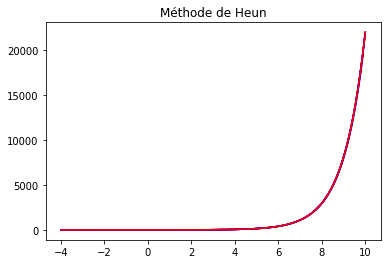

In [68]:
for dt in [0.1, 0.01, 0.001, 0.0001]:
    T,X = solve_heun(f,np.exp(-4),dt,-4,10)
    plt.plot(T,X, "b")
    plt.plot(T,np.exp(T),"r")
plt.title("Méthode de Heun")
plt.show();

### Comparaison Euler explicite et méthode de Heun

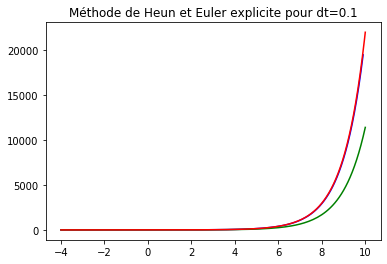

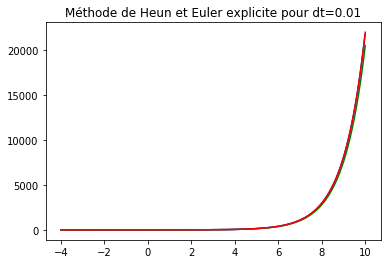

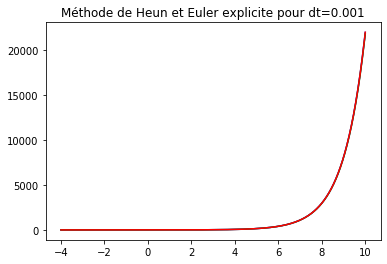

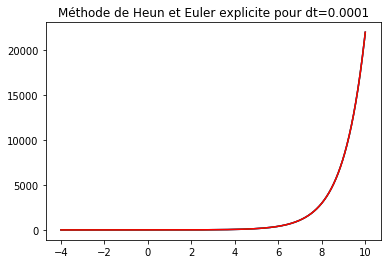

In [69]:
for dt in [0.1, 0.01, 0.001, 0.0001]:
    TH,H = solve_heun(f,np.exp(-4),dt,-4,10)
    plt.plot(TH,H, "b")
    TE,E = solve_euler_explicit(f,np.exp(-4),dt,-4,10)
    plt.plot(TE,E, "g")
    plt.plot(T,np.exp(T),"r")
    plt.title(f"Méthode de Heun et Euler explicite pour dt={dt}")
    plt.show();

La méthode de Heun converge "mieux" que le schéma d'Euler explicite. Pour dt=0.1, la solution approchée par la méthode de Heun est en effet presque égale à la solution exacte alors que celle donnée par le schéma d'Euler explicite est très différente.

Montrons que:

$\large{ \left \| e^{j+1} \right \|=\Delta t_j \ \frac{\left \| f(t_{j+1},x^{j+1})-f(t_{j},x^{j}) \right \|}{2}+O(\Delta t_j^3)} \ \ (1)$


On a :

$\large{e^{j+1}= x^j+\int_{t_{j}}^{t_{j+1}}f(s,x(s))ds -x^{j+1}}  \ \ (2)$


$\large{x^j=x(t_j)}\ \ (3)$

et 

$\large{x^{j+1}=x^j+\Delta t_j \ f(t_j,x^j)}\ \ (4)$

On applique le théorème fondamental de l'analyse:

$\large{\int_{t_j}^{t_{j+1}}f(s,x(s))ds=\int_{t_j}^{t_{j+1}}x'(s)ds=x(t_{j+1})-x(t_j)} \ \ (5) $

On fait un développement limité de $ x^{j+1}$ à l'ordre 2:

$ \large{x(t_{j+1})=x(t_j)+\Delta t_j \ x'(t_{j})+\frac{\Delta t_j^2}{2} \ x''(t_j) + O(\Delta t_j^3)} \ \ (6)$

En remplaçant les expressions (4) et (5) dans (2), puis (6), on obtient:

$ \large{e^{j+1}=x^j+x(t_{j+1})-x(t_j)-(x^j+\Delta t_j \ f(t_j,x^j))\\
=x(t_j)+\Delta t_j \ x'(t_{j})+\frac{\Delta t_j^2}{2} \ x''(t_j) + O(\Delta t_j^3)-x(t_j)-\Delta t_j \ f(t_j,x^j)}$

Or, 

$\ \large{f(t_j,x^j)=x'(t_j)}$

On obtient donc en simplifiant:

$\large{e^{j+1}=\frac{\Delta t_j^2}{2} \ x''(t_j) + O(\Delta t_j^3)} \ \ (7)$

On fait maintenant le développement limité de $f(t_{j+1},x^{j+1})$ à l'ordre 1 pour retrouver l'expression (7):

$ \large{f(t_{j+1},x^{j+1})=f(t_{j},x^{j})+\Delta t_j \frac{\partial f }{\partial t}(t_j,x_j)+\Delta t_j  f(t_j)\frac{\partial f }{\partial x}(t_j,x_j)+O(\Delta t_j^2)\\
=f(t_{j},x^{j})+\Delta t_j (\frac{\partial f }{\partial t}+f(t_j)\frac{\partial f }{\partial x})(t_j,x_j)+O(\Delta t_j^2) \\}$

On reconnait $ x''(t_j)$ et on trouve:

$ \large{\Delta t_j x''(t_j)=f(t_{j+1},x^{j+1})-f(t_{j},x^{j})+O(\Delta t_j^2)} \ \ (8)$

On injecte l'expression (8) dans l'expression (7):

$ \large{  e^{j+1} =\Delta t_j \ \frac{ f(t_{j+1},x^{j+1})-f(t_{j},x^{j})+O(\Delta t_j^2) }{2}+O(\Delta t_j^3)}=\Delta t_j\frac{ f(t_{j+1},x^{j+1})-f(t_{j},x^{j})}{2}+O(\Delta t_j^3)$ 

En passant à la norme, on retrouve bien l'expression (1):

$\large{ \left \| e^{j+1} \right \|=\Delta t_j \ \frac{\left \| f(t_{j+1},x^{j+1})-f(t_{j},x^{j}) \right \|}{2}+O(\Delta t_j^3)} \ \ $
 

On a vu qu'on a $ \large{f(t_{j+1},x^{j+1})-f(t_{j},x^{j})=\Delta t_j x''(t_j)}+O(\Delta t_j^2)\ \ (8)$

D'où 
$\large{f(t_{j+1},x^{j+1})-f(t_{j},x^{j})=O(\Delta t_j)}\ \ (8)$ et donc on a bien $\large{ \left \| e^{j+1} \right \|=O(\Delta t_j^2)}$

Le choix $\large{\Delta t_{new} = \Delta t_j \sqrt{\frac{T_{abs}}{e^{j+1}}} \ \ (C)}$ permet de réduire le pas de temps lorsque $\large{e^{j+1} \le T_{abs}}$ on a donc $\large{\Delta t_{new} \le \Delta t_{j}}$ et inversement lorsqu'il y a "de la marge avec une erreur très petite. Le fait de prendre la racine de $\large{\frac{T_{abs}}{e^{j+1}}}$ est le respect de l'homogénéité puisque l'erreur est de l'ordre de grandeur de $\large{\Delta t^2}$

In [2]:

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2) #linalg.norm(x_back-x)/2 est une estimation de e(j+1) 
            dt = 0.9 * dt * sqrt(ratio_abs_error) #le 0.9 joue la marge de sécurité et sinon c'est la formule (C)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2: #on ne veut pas avoir de dt trop grand pour avoir une courbe assez lisse quand même
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Dans la fonction précédente, il y a en fait une adaptation du pas de temps pour calculer les points intermédiaires grâce à la formule (C). Seulement, on ne met dans les variables de stockage ts et xs que des points écartés au minimum de dtmax/2 pour ne pas surcharger ces tableaux et au maximum de dtmax pour garder suffisamment de résolution. Pour ne jamais dépasser cette limite de dtmax, il faut garder en mémoire le point précédent sous t_next, x_next pour y revenir dans le cas où on dépasse dtmax.